In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
df=pd.read_csv("economic_index.csv")
df.head()
#problem statement: need to develop a model that predicts index_price with respect to interest rate and unemployment rate

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [59]:
#here we are getting additional columns unamed year month these are not required so removing them

df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)


In [60]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [61]:
#check for null values

df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [63]:
df.describe()

,interest_rate,unemployment_rate,index_price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


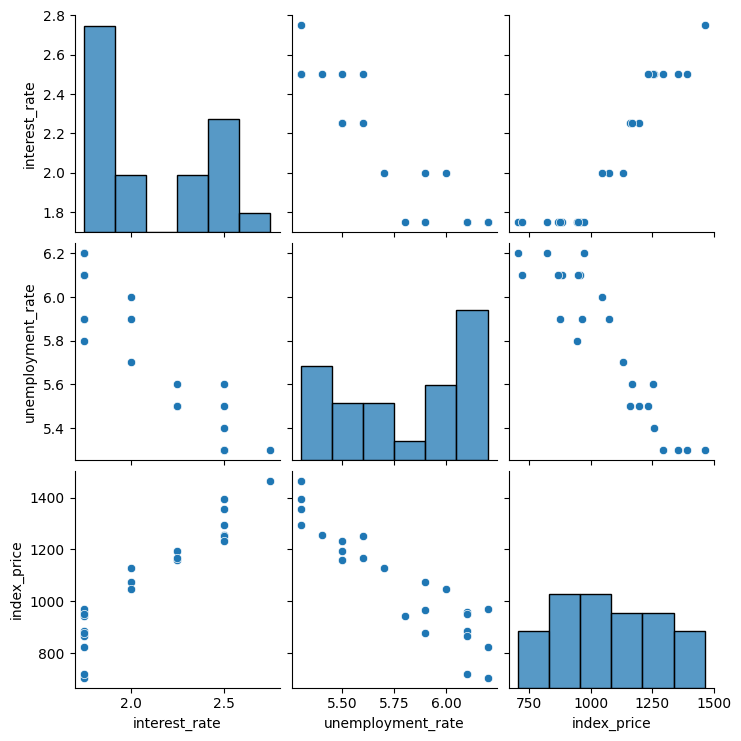

In [64]:
#now lets plot the data and see what pattern they follow

import seaborn as sns

sns.pairplot(df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

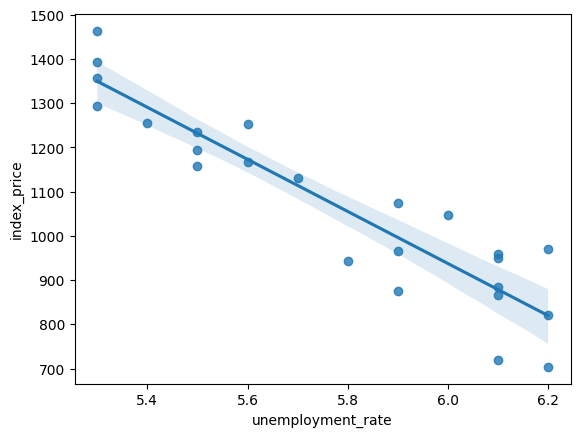

In [65]:
#from the graph its evident that they follow linear trend
sns.regplot(data=df,x="unemployment_rate",y="index_price")

<Axes: xlabel='interest_rate', ylabel='index_price'>

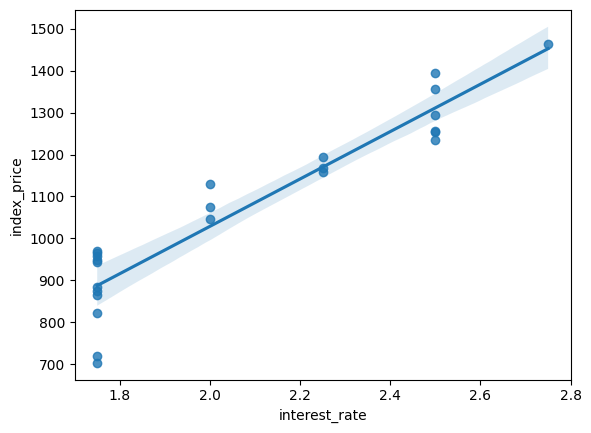

In [66]:
sns.regplot(data=df,x="interest_rate",y="index_price")

In [67]:
X=df[["interest_rate","unemployment_rate"]]
y=df["index_price"]


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [71]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [72]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [73]:
reg.fit(X_train, y_train)

LinearRegression()

In [74]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [75]:
np.mean(validation_score)

-5914.828180162386

In [76]:
y_pred=reg.predict(X_test)

In [77]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [79]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


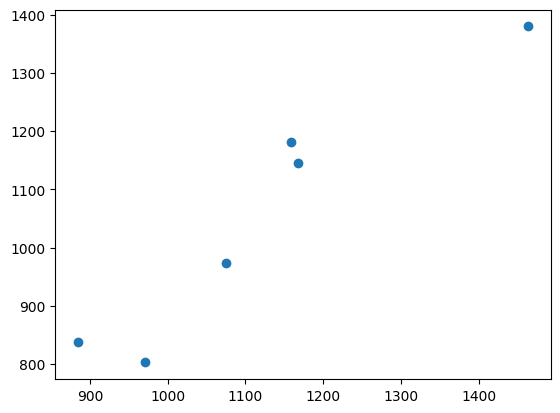

In [ ]:
plt.scatter(y_test,y_pred) #if you get a plot like below where you are seeing a linear relation ship that means model has performed well

In [81]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


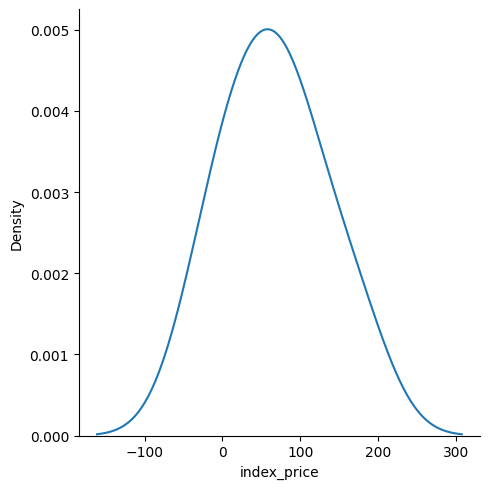

In [ ]:
## Plot this residuals
sns.displot(residuals,kind='kde') #if we get a normal distribution graph that means our model is good

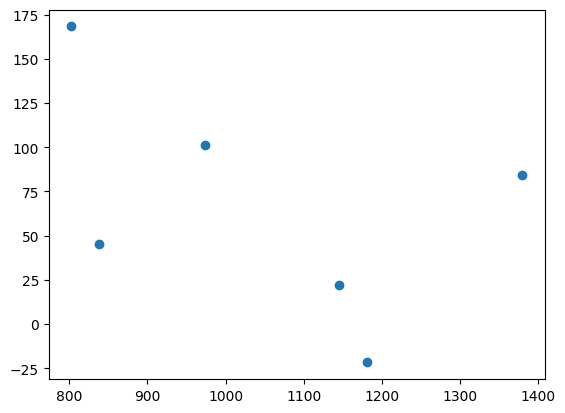

In [ ]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)  #you should see the data is uniformly distributed

In [85]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 02 Aug 2025   Prob (F-statistic):                       0.754
Time:                        17:30:02   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
print(reg.coef_)
print(reg.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
